In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.shape

(569, 32)

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)

In [7]:
le.transform(['M', 'B'])

array([1, 0], dtype=int64)

In [8]:
from sklearn.cross_validation import train_test_split

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=1)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [14]:
pipelr = Pipeline([('scl', StandardScaler()), ('pca', PCA(n_components=2)), #3 step pipeline with scaling PCA and model fit
                  ("clf", LogisticRegression(random_state=1))])
pipelr.fit(xtrain, ytrain)
print "Test accuracy:", accuracy_score(pipelr.predict(xtest), ytest)

 Test accuracy: 0.947368421053


In [15]:
from sklearn.cross_validation import StratifiedKFold #preserve class proportions to ensure each fold is representative 
                                                    #of class proportions in training dataset

In [18]:
kfold = StratifiedKFold(y=ytrain, n_folds=10, random_state=1)
scores = []
for k, (train, test) in enumerate(kfold):
    pipelr.fit(xtrain[train], ytrain[train])
    scores.append(accuracy_score(pipelr.predict(xtrain[test]), ytrain[test]))
    print "Fold: %s, Class dist.: %s, Accuracy: %0.4f" %(k+1, np.bincount(ytrain[train]), 
                                                        accuracy_score(pipelr.predict(xtrain[test]), ytrain[test]))

Fold: 1, Class dist.: [256 153], Accuracy: 0.8913
Fold: 2, Class dist.: [256 153], Accuracy: 0.9783
Fold: 3, Class dist.: [256 153], Accuracy: 0.9783
Fold: 4, Class dist.: [256 153], Accuracy: 0.9130
Fold: 5, Class dist.: [256 153], Accuracy: 0.9348
Fold: 6, Class dist.: [257 153], Accuracy: 0.9778
Fold: 7, Class dist.: [257 153], Accuracy: 0.9333
Fold: 8, Class dist.: [257 153], Accuracy: 0.9556
Fold: 9, Class dist.: [257 153], Accuracy: 0.9778
Fold: 10, Class dist.: [257 153], Accuracy: 0.9556


In [19]:
print "CV accuracy: %0.4f +/- %0.3f" %(np.mean(scores), np.std(scores))

CV accuracy: 0.9496 +/- 0.029


In [20]:
from sklearn.cross_validation import cross_val_score

In [21]:
scores = cross_val_score(estimator=pipelr, X=xtrain, y=ytrain, cv=10)
print "CV accuracy scores:", scores

CV accuracy scores: [ 0.89130435  0.97826087  0.97826087  0.91304348  0.93478261  0.97777778
  0.93333333  0.95555556  0.97777778  0.95555556]


In [22]:
from sklearn.learning_curve import learning_curve

C:\Users\Steve\Anaconda2\envs\dato-env\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


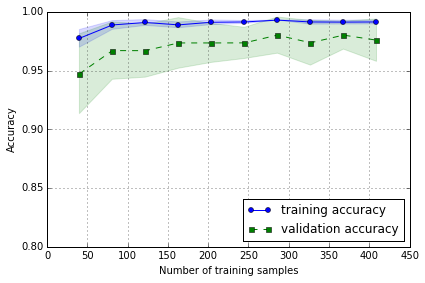

In [24]:
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(penalty='l2', random_state=0))])

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=xtrain,
                               y=ytrain,
                               train_sizes=np.linspace(0.1, 1.0, 10), #use from 10%-90% of training data
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,  #fill with blue for confidence bars
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()

In [25]:
from sklearn.learning_curve import validation_curve

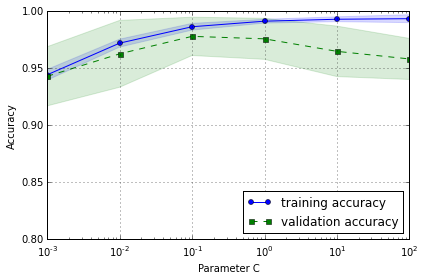

In [26]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=xtrain, 
                y=ytrain, 
                param_name='clf__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()

In [27]:
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC

In [28]:
pipe_svc = Pipeline([('scl', StandardScaler()), #scale before fitting model
            ('clf', SVC(random_state=1))])

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'clf__C': param_range, 
               'clf__kernel': ['linear']},
                 {'clf__C': param_range, 
                  'clf__gamma': param_range, 
                  'clf__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10)
gs = gs.fit(xtrain, ytrain)
print(gs.best_score_)
print(gs.best_params_)

0.978021978022
{'clf__C': 0.1, 'clf__kernel': 'linear'}


In [29]:
clf = gs.best_estimator_
clf.fit(xtrain, ytrain)
print "Test accuracy:", accuracy_score(clf.predict(xtest), ytest)

Test accuracy: 0.964912280702


In [30]:
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=10)
scores = cross_val_score(gs, X, y, scoring='accuracy', cv=5)
print "CV accuracy: %0.4f +/- %0.4f" %(np.mean(scores), np.std(scores)) 

CV accuracy: 0.9719 +/- 0.0115


In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), param_grid={'max_depth':[1,2,3,4,5,6,7,None]},
                 scoring='accuracy', cv=5)
scores = cross_val_score(gs, xtrain, ytrain, scoring='accuracy', cv=5)
print "CV accuracy: %0.4f +/- %0.4f" %(np.mean(scores), np.std(scores)) 

CV accuracy: 0.9077 +/- 0.0454


In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
pipe_svc.fit(xtrain, ytrain)
ypred = pipe_svc.predict(xtest)
confmat = confusion_matrix(y_true=ytest, y_pred=ypred)
print confmat

[[71  1]
 [ 2 40]]


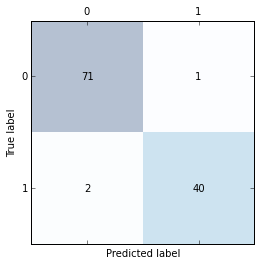

In [36]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [39]:
print "Precision:", precision_score(ytest, ypred)
print "Recall:", recall_score(ytest, ypred)
print "F1 score:", f1_score(ytest, ypred)

Precision: 0.975609756098
Recall: 0.952380952381
F1 score: 0.963855421687


In [41]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

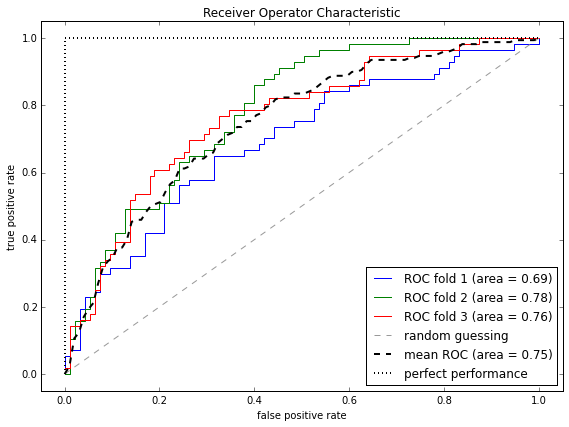

In [44]:
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', LogisticRegression(penalty='l2', 
                                               random_state=0, 
                                               C=100.0))])

xtrain2 = xtrain[:, [4, 14]] #only use 2 features
cv = StratifiedKFold(ytrain, n_folds=3, random_state=1)
fig = plt.figure(figsize=(8, 6))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(xtrain2[train], #test set probabilities
                         ytrain[train]).predict_proba(xtrain2[test])

    fpr, tpr, thresholds = roc_curve(ytrain[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             lw=1,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         lw=2,
         linestyle=':',
         color='black',
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()